In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import scipy.stats as stats
from matplotlib.font_manager import FontProperties
from matplotlib.font_manager import _rebuild
_rebuild()
#plt.rcParams['font.family']='sans-serif'
#zhfont = matplotlib.font_manager.FontProperties(fname=r"C:\Users\User\Anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts")

myfont=FontProperties(fname=r'C:\Users\User\Anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\msjh.ttf')
sns.set(font=myfont.get_family())
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft YaHei']})

df = pd.DataFrame.from_csv('D:/kaggle/HRCommaSep/HR_comma_sep.csv', index_col=None)
df.isnull().any()
df.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
df = df.rename(columns={'satisfaction_level': '工作滿意度', 
                        'last_evaluation': '最後一次考績',
                        'number_project': '涉及專案數量',
                        'average_montly_hours': '平均每月上班時數',
                        'time_spend_company': '年資',
                        'Work_accident': '工作意外',
                        'promotion_last_5years': '五年內晉升次數',
                        'sales' : '部門職位',
                        'left' : '離職',
                        'salary' : '薪資'
                        })
y = df['離職']
df.drop(labels=['離職'], axis=1, inplace = True)
df.insert(0, '離職', y)
df.head()

,離職,工作滿意度,最後一次考績,涉及專案數量,平均每月上班時數,年資,工作意外,五年內晉升次數,部門職位,薪資
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.dtypes

離職            int64
工作滿意度       float64
最後一次考績      float64
涉及專案數量        int64
平均每月上班時數      int64
年資            int64
工作意外          int64
五年內晉升次數       int64
部門職位         object
薪資           object
dtype: object

In [5]:
turnover_rate = df.離職.value_counts() / len(df)
turnover_rate

0    0.761917
1    0.238083
Name: 離職, dtype: float64

In [6]:
df.describe()

,離職,工作滿意度,最後一次考績,涉及專案數量,平均每月上班時數,年資,工作意外,五年內晉升次數
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [7]:
turnover_Summary = df.groupby('離職')
turnover_Summary.mean()

,工作滿意度,最後一次考績,涉及專案數量,平均每月上班時數,年資,工作意外,五年內晉升次數
離職,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


,離職,工作滿意度,最後一次考績,涉及專案數量,平均每月上班時數,年資,工作意外,五年內晉升次數
離職,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
工作滿意度,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
最後一次考績,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
涉及專案數量,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
平均每月上班時數,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
年資,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
工作意外,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
五年內晉升次數,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


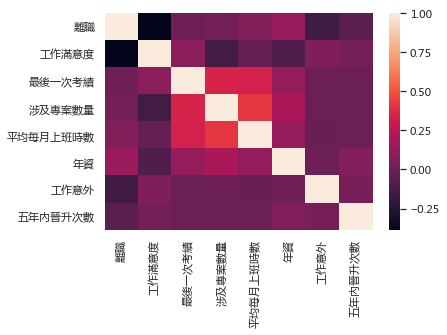

In [8]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
corr

In [9]:
# 離職人員滿意度檢定
# H0: 離職人員工作滿意度 = 全體人員工作滿意度
# H1: 離職人員工作滿意度 != 全體人員工作滿意度

population_avg = df['工作滿意度'].mean()
trunover_satisfy_avg = df[df['離職']==1]['工作滿意度']
stats.ttest_1samp(a=trunover_satisfy_avg, popmean = population_avg)
tv_pv = '%6.3f , %6.3f' % stats.ttest_1samp(a=trunover_satisfy_avg, popmean = population_avg)
tv = float(tv_pv.split(',')[0])
type(tv)
if abs(tv) > 1.96:
    print('Reject H0: 有足夠證據拒絕 離職人員工作滿意度 = 全體人員工作滿意度')
else:
    print('Accept H0: 沒有足夠證據拒絕 離職人員工作滿意度 = 全體人員工作滿意度')
    

Reject H0: 有足夠證據拒絕 離職人員工作滿意度 = 全體人員工作滿意度


Text(0, 0.5, '員工數量')

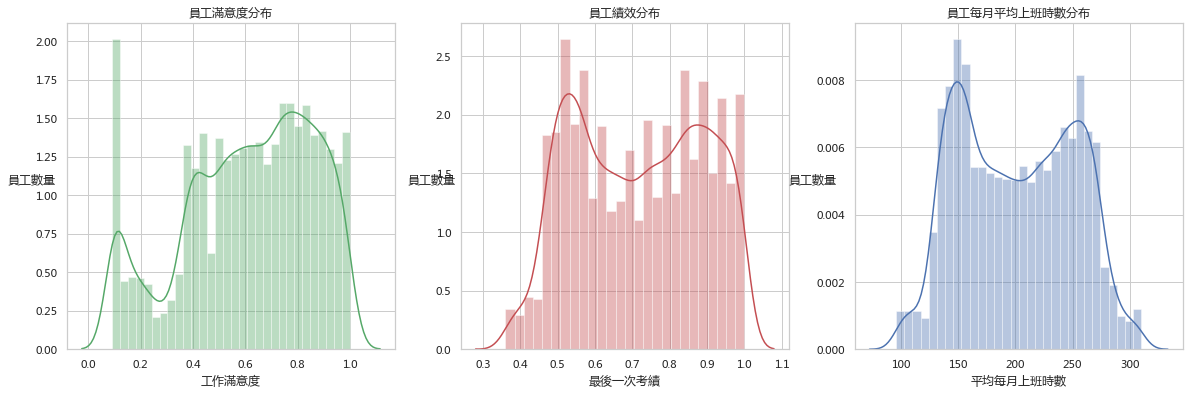

In [10]:
f, axes = plt.subplots(ncols=3, figsize=(20, 6))

# Graph Employee Satisfaction
sns.distplot(df.工作滿意度, kde=True, color="g", ax=axes[0]).set_title('員工滿意度分布')
axes[0].set_ylabel('員工數量',rotation=0)

# Graph Employee Evaluation
sns.distplot(df.最後一次考績, kde=True, color="r", ax=axes[1]).set_title('員工績效分布')
axes[1].set_ylabel('員工數量',rotation=0)

# Graph Employee Average Monthly Hours
sns.distplot(df.平均每月上班時數, kde=True, color="b", ax=axes[2]).set_title('員工每月平均上班時數分布')
axes[2].set_ylabel('員工數量',rotation=0)

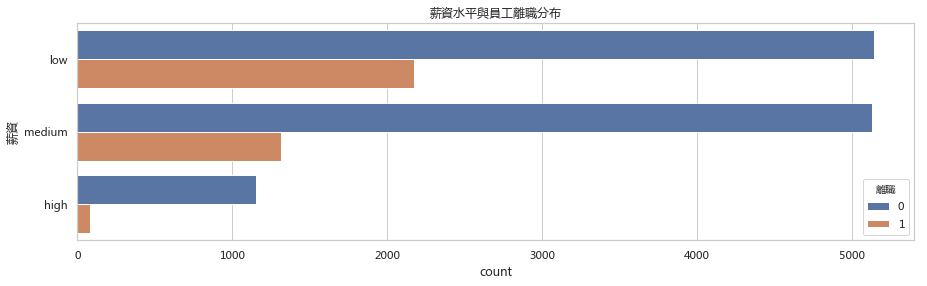

In [11]:
#員工薪資 vs 離職

fig, axes = plt.subplots(figsize=(15, 4))
sns.countplot(y="薪資", hue='離職', data=df).set_title('薪資水平與員工離職分布');

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

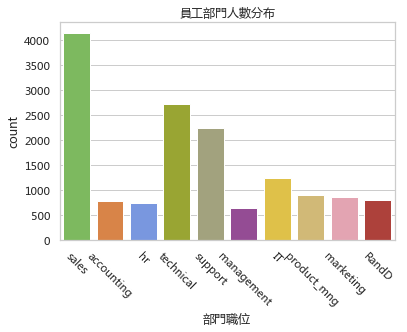

In [12]:
#員工部門職務 vs 離職

color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']
sns.countplot(x='部門職位', data=df, palette=color_types).set_title('員工部門人數分布');
plt.xticks(rotation=-45)

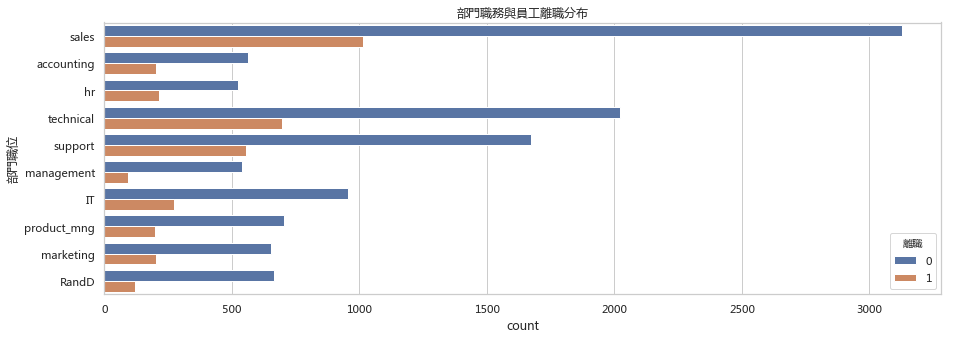

In [13]:
fig, axes = plt.subplots(figsize=(15, 5))
sns.countplot(y="部門職位", hue='離職', data=df).set_title('部門職務與員工離職分布');

[Text(0, 0.5, '百分比')]

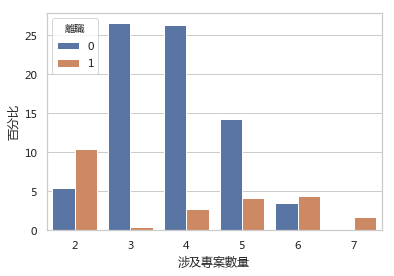

In [14]:
# 員工專案數 vs 離職

ax = sns.barplot(x="涉及專案數量", y="涉及專案數量", 
                 hue="離職", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="百分比")

Text(0.5, 1.0, '員工考績分布 - 離職 V.S.未離職')

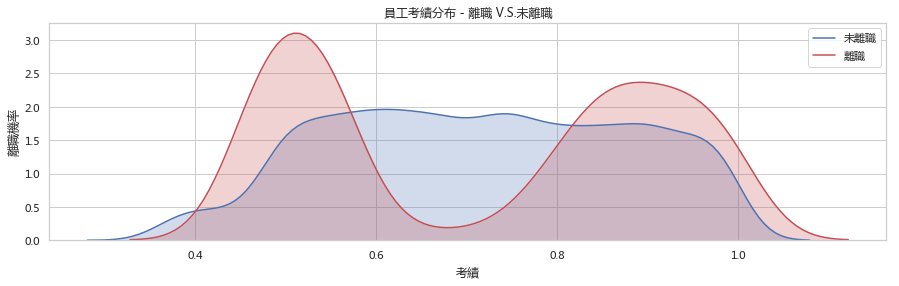

In [15]:
# 考績 vs 離職

fig = plt.figure(figsize=(15,4))
p = sns.kdeplot(df.loc[(df['離職'] == 0),'最後一次考績'] , color='b',shade=True,label='未離職')
p = sns.kdeplot(df.loc[(df['離職'] == 1),'最後一次考績'] , color='r',shade=True,label='離職')
p.set(xlabel='考績', ylabel='離職機率')
plt.title('員工考績分布 - 離職 V.S.未離職')



Text(0.5, 1.0, '員工平均每月上班時數分布 - 離職 V.S.未離職')

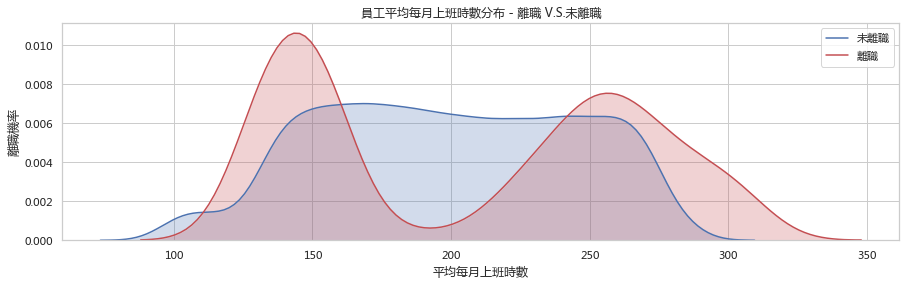

In [16]:
# 離職 vs 每月平均上班時數

fig = plt.figure(figsize=(15,4))
p = sns.kdeplot(df.loc[(df['離職'] == 0),'平均每月上班時數'] , color='b',shade=True,label='未離職')
p = sns.kdeplot(df.loc[(df['離職'] == 1),'平均每月上班時數'] , color='r',shade=True,label='離職')
p.set(xlabel='平均每月上班時數', ylabel='離職機率')
plt.title('員工平均每月上班時數分布 - 離職 V.S.未離職')



Text(0.5, 1.0, '員工工作滿意度分布 - 離職 V.S.未離職')

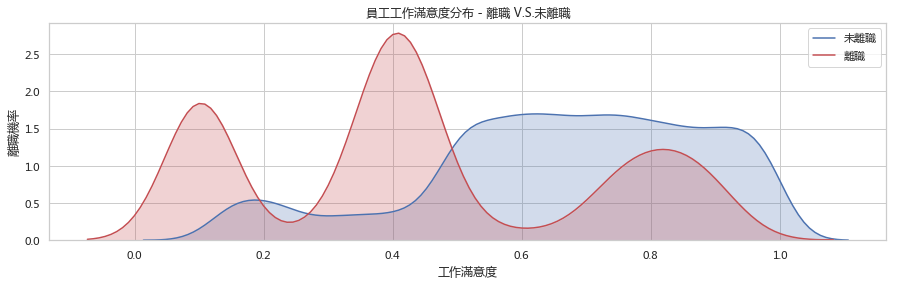

In [17]:
# 離職 vs 員工滿意度

fig = plt.figure(figsize=(15,4))
p = sns.kdeplot(df.loc[(df['離職'] == 0),'工作滿意度'] , color='b',shade=True,label='未離職')
p = sns.kdeplot(df.loc[(df['離職'] == 1),'工作滿意度'] , color='r',shade=True,label='離職')
p.set(xlabel='工作滿意度', ylabel='離職機率')
plt.title('員工工作滿意度分布 - 離職 V.S.未離職')


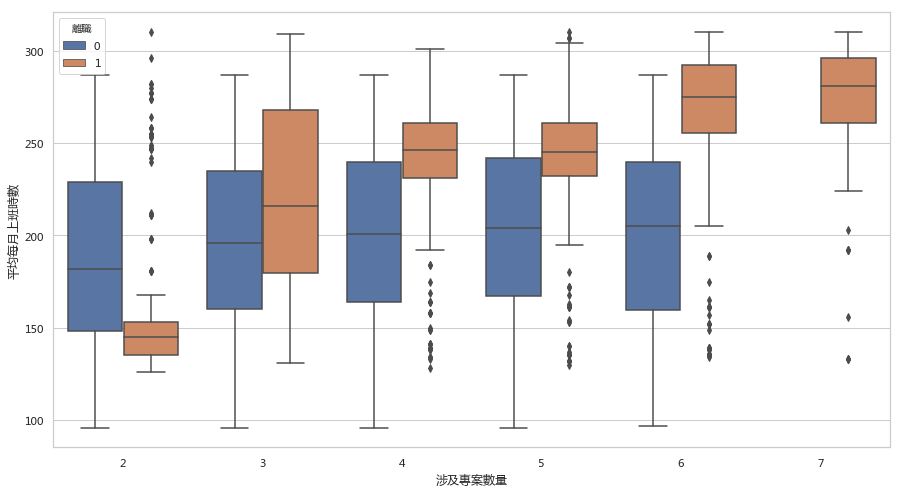

In [18]:
# 專案數 vs 每月上班時數 - 離職情況

fig = plt.figure(figsize=(15,8))
sns.boxplot(x="涉及專案數量", y="平均每月上班時數", hue="離職", data=df)


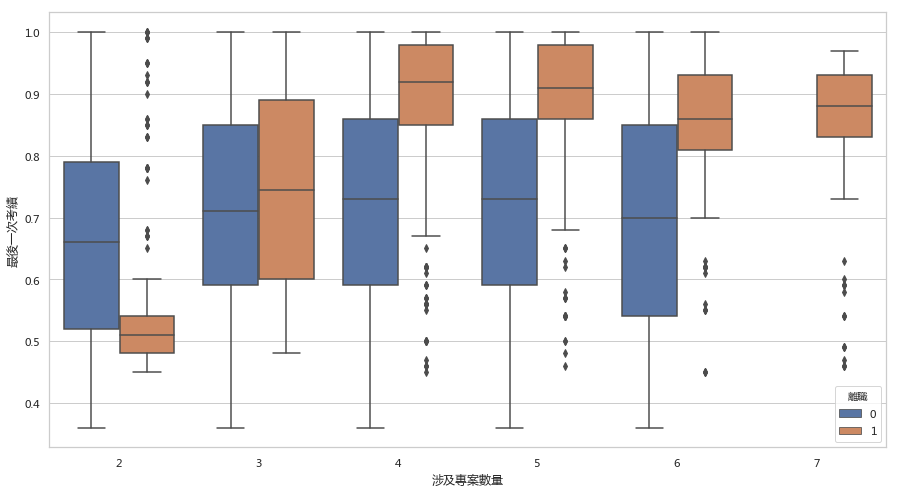

In [19]:
# 專案數 vs 工作滿意度 - 離職情況

fig = plt.figure(figsize=(15,8))
sns.boxplot(x="涉及專案數量", y="最後一次考績", hue="離職", data=df)


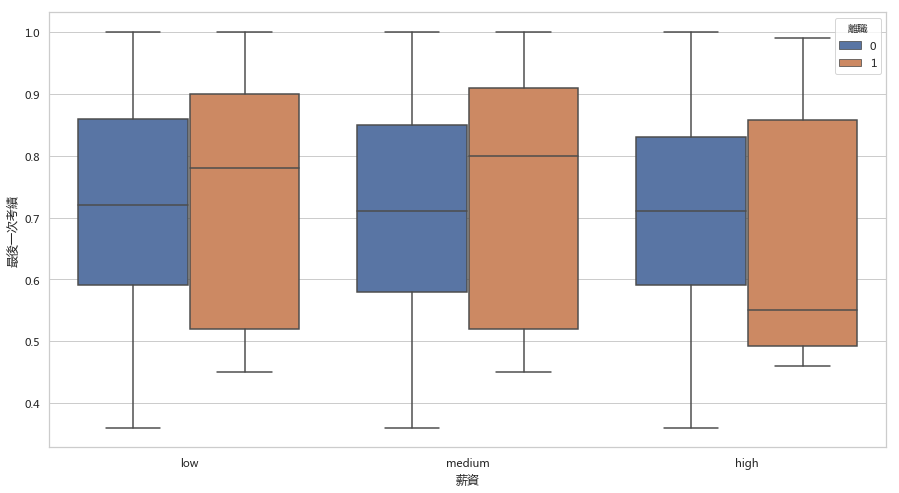

In [20]:
# 專案數 vs 工作滿意度 - 離職情況
fig = plt.figure(figsize=(15,8))
sns.boxplot(x="薪資", y="最後一次考績", hue="離職", data=df)

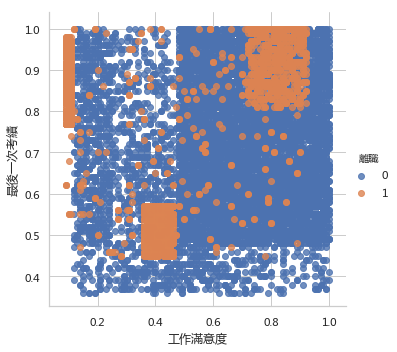

In [21]:
# 工作滿意度 vs 考績

sns.lmplot(x='工作滿意度', y='最後一次考績', data=df,
           fit_reg=False, # No regression line
           hue='離職')   



[Text(0, 0.5, '離職率')]

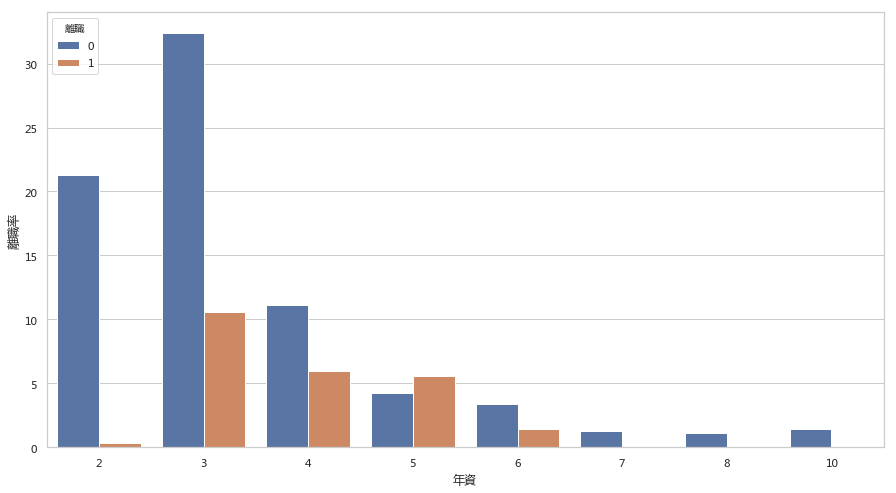

In [22]:
# 年資 vs 離職

fig = plt.figure(figsize=(15,8))
ax = sns.barplot(x="年資", y="年資", hue="離職", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="離職率")


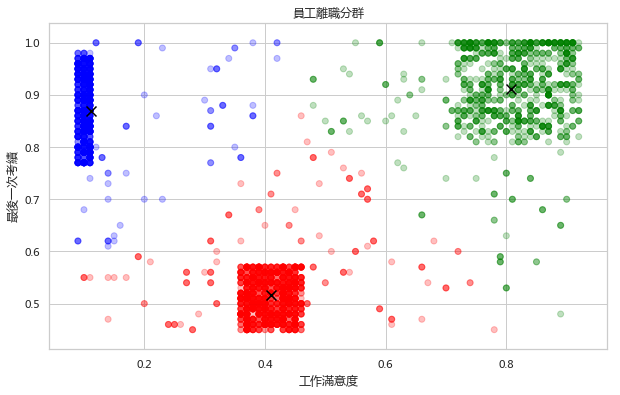

In [23]:
# K-means clustering of Employee Turnover 

#(blue) cluster 1 : 工作認真 但 不開心
#(Red)  cluster 2 : 工作不認真 且 不開心
#(Green)cluster 3 : 工作認真 但 開心

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans.fit(df[df.離職==1][["工作滿意度","最後一次考績"]])
kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10,6))
plt.scatter(x="工作滿意度", y="最後一次考績", data=df[df.離職==1], alpha=0.25, color=kmeans_colors)
plt.xlabel("工作滿意度")
plt.ylabel("最後一次考績")
plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], color='black', marker='x', s=100)
plt.title('員工離職分群')
plt.show()



In [24]:
# 特徵重要性: 滿意度、年資、考績
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


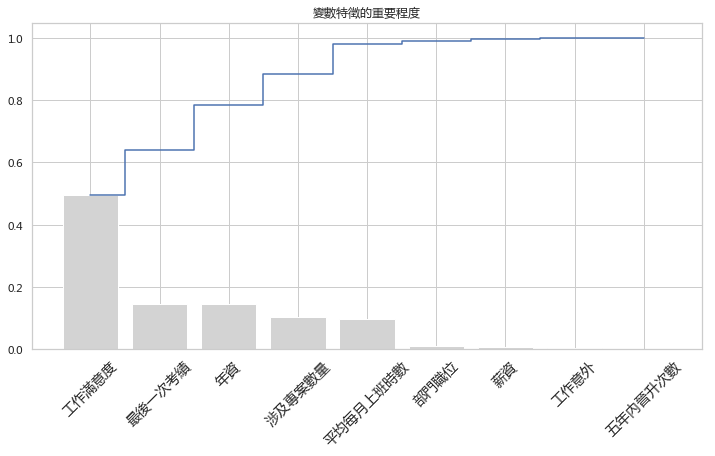

In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df['部門職位'] = df["部門職位"].astype('category').cat.codes
df["薪資"] = df["薪資"].astype('category').cat.codes

predict_target = '離職'
X = df.drop('離職',axis=1)
y = df[predict_target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13, stratify=y)

# 將特徵權重排序
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)
imp = decision_tree.feature_importances_
f_names = df.drop(['離職'], axis=1).columns

# 取得特徵權重排序的索引值
indices = np.argsort(imp)[::-1]
plt.figure(figsize=(12,6))
plt.title("變數特徵的重要程度")
plt.bar(range(len(indices)), imp[indices], color='lightgray',  align="center") #長條圖
plt.step(range(len(indices)), np.cumsum(imp[indices]), where='mid', label='Cumulative') #階梯圖
plt.xticks(range(len(indices)), f_names[indices], rotation=45,fontsize=14) # x label
plt.show()

In [32]:
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("基本模型精準度 %2.2f" % accuracy_score(y_test, y_base_rate))


基本模型精準度 0.76


In [33]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', C=1)
model.fit(X_train, y_train)
print ("羅吉斯回歸分類精準度 %2.2f" % accuracy_score(y_test, model.predict(X_test)))


羅吉斯回歸分類精準度 0.76


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

AUC: 0.820 (0.011)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')
svc_model.fit(X_train, y_train)
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1) #GridSearchCV(自動調參）
clf.fit(X_train, y_train)
print('Best score for training data:', clf.best_score_)
print('Best C:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best gamma:',clf.best_estimator_.gamma)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best score for training data: 0.9561630135844654
Best C: 1000
Best kernel: rbf
Best gamma: 0.001


In [30]:
print('Best score for training data:', clf.best_score_)
print('Best C:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best gamma:',clf.best_estimator_.gamma)

Best score for training data: 0.9561630135844654
Best C: 1000
Best kernel: rbf
Best gamma: 0.001


In [37]:
#clf.score(X_test, y_test)  
svm.SVC(C=1000, kernel='rbf', gamma=0.001).fit(X_train, y_train).score(X_test, y_test)

0.955

In [59]:
# df2=df.drop('離職','涉及專案數量','平均每月上班時數','工作意外','五年內晉升次數','薪資','部門職位',axis=1,, inplace = True)
df2 = df[['工作滿意度','最後一次考績','年資','離職']]
predict_target = '離職'
X = df2.drop('離職',axis=1)
y = df2[predict_target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13, stratify=y)

svc_model_v2 = svm.SVC(gamma=0.001, C=100., kernel='rbf')
svc_model_v2.fit(X_train, y_train)
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]
clf2 = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1) #GridSearchCV(自動調參）
clf2.fit(X_train, y_train)
print('Best score for training data for v2:', clf2.best_score_)
print('Best C for v2:',clf2.best_estimator_.C)
print('Best kernel for v2:',clf2.best_estimator_.kernel)
print('Best gamma for v2:',clf2.best_estimator_.gamma)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best score for training data for v2: 0.7740645053754479
Best C for v2: 1000
Best kernel for v2: rbf
Best gamma for v2: 0.001


In [60]:
clf2.score(X_test, y_test)  

0.7683333333333333